In [1]:
import sys
from rasterio.crs import CRS
from rasterio.warp import Resampling, reproject
import rioxarray as rxr
import matplotlib.pyplot as plt

In [2]:
import emit_tools

In [3]:
#set filename for emit data
emit_filename = '/Users/spai/Downloads/EMIT_newdata_EMIT_L2A_RFL_001_20230504T091727_2312406_026.nc'

In [4]:
#get emit data
ds_emit = emit_tools.emit_xarray(emit_filename, ortho=True)

In [5]:
#show data info from rio
ds_emit.rio.crs
ds_emit.rio.bounds()

(26.6927463046597, -27.4535562546975, 28.28474098413239, -25.8480057622184)

In [6]:
#get landsat data
landsat = rxr.open_rasterio('/Users/spai/Downloads/Landsat_newdata_GFCC30TC_p171r078_TC_2015/p171r078_TC_2015.tif',masked=True).squeeze()

In [7]:
#set water to NA, anything >100 will be set to NA
landsat_nowater = landsat.where(landsat <= 100)

In [8]:
#reproject treecover (bilinear interpolation) and match emit data
landsat_emitCRS = landsat_nowater.rio.reproject_match(ds_emit, resampling=Resampling.bilinear)

In [9]:
#create 011_020_TC mask (11%, 20%)
mask_TC = landsat_emitCRS.where(landsat_emitCRS >= 11, 1, 0).where(landsat_emitCRS < 20, 1, 0)

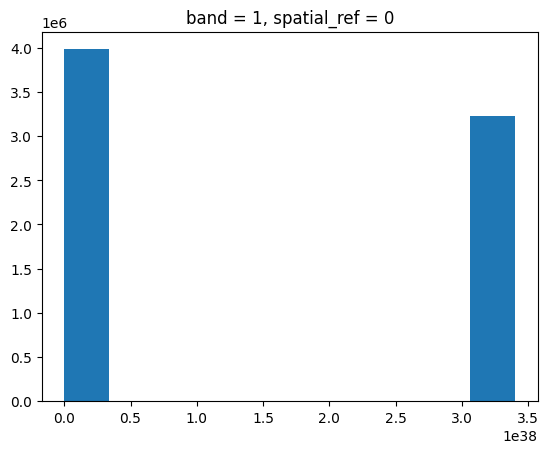

In [10]:
#generate histogram of pixels for full scence
#..store histogram info
h_landsat = landsat_emitCRS.plot.hist()

In [11]:
#..show plot
plt.show()

In [12]:
#empty list for bands
band_numbers = ds_emit['bands'].data
emit_masked_TC = [None] * len(band_numbers);
print(range(len(band_numbers)))

range(0, 285)


In [13]:
#loop over bands and apply mask
for i in range(len(band_numbers)):
    #print status every 10 bands
    if (i % 10) == 0:
        print(i)
    emit_masked_TC[i] = ds_emit['reflectance'].sel(bands=i).data * mask_TC

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280


(array([3984774.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 3230780.]),
 array([0.00000000e+00, 3.40282347e+37, 6.80564693e+37, 1.02084704e+38,
        1.36112939e+38, 1.70141173e+38, 2.04169408e+38, 2.38197633e+38,
        2.72225877e+38, 3.06254122e+38, 3.40282347e+38]),
 <BarContainer object of 10 artists>)

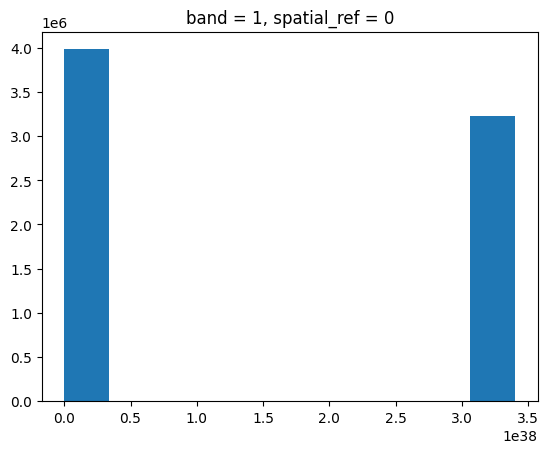

In [14]:
landsat_emitCRS.plot.hist()

In [15]:
mask_TC

<xarray.DataArray (y: 2961, x: 2936)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)
Coordinates:
  * x            (x) float64 26.69 26.69 26.69 26.69 ... 28.28 28.28 28.28 28.28
  * y            (y) float64 -25.85 -25.85 -25.85 ... -27.45 -27.45 -27.45
    band         int64 1
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    _FillValue:     3.402823466e+38

In [16]:
ds_emit['reflectance']

<xarray.DataArray 'reflectance' (latitude: 2961, longitude: 2936, bands: 285)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * latitude          (latitude) float64 -25.85 -25.85 -25.85 ... -27.45 -27.45
  * longitude         (longitude) float64 26.69 26.69 26.69 ... 28.28 28.28
    fwhm              (bands) float32 8.415 8.415 8.415 ... 8.806 8.807 8.809
    good_wavelengths  (bands) float32 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    wavelengths       (bands) float32 381.0 388.4 395.8 ... 2.486e+03 2.493e+03
    spatial_ref       int64 0
Dimensions without coordinates: bands
Attributes:
    long_name:  Surface Reflectance
    units:      unitless

In [17]:
ds_emit['reflectance'].sel(bands=50)

<xarray.DataArray 'reflectance' (latitude: 2961, longitude: 2936)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * latitude          (latitude) float64 -25.85 -25.85 -25.85 ... -27.45 -27.45
  * longitude         (longitude) float64 26.69 26.69 26.69 ... 28.28 28.28
    fwhm              float32 8.481
    good_wavelengths  float32 1.0
    wavelengths       float32 753.1
    spatial_ref       int64 0
Attributes:
    long_name:  Surface Reflectance
    units:      unitless

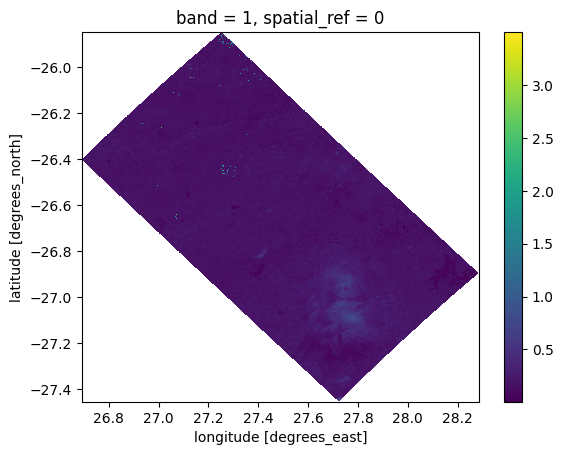

In [18]:
emit_mask_v0 = ds_emit['reflectance'].sel(bands=50).data * mask_TC.rename({'x': 'longitude', 'y':'latitude'})
emit_mask_v0.plot()
plt.show()